# Regression with TensorFlow

In [437]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [438]:
data=pd.read_csv('dataset.csv')

In [439]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [440]:
data.shape

(300, 2)

In [441]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [442]:
data.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [443]:
x=data[["x"]]
y=data["y"]

In [444]:
x.head()

,x
0,77
1,21
2,22
3,20
4,36


In [445]:
y.head()

0    79.775152
1    23.177279
2    25.609262
3    17.857388
4    41.849864
Name: y, dtype: float64

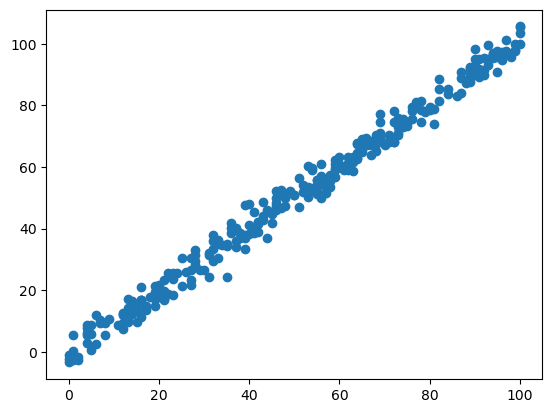

In [446]:
plt.scatter(x,y)
plt.show()

In [447]:
from sklearn.model_selection import train_test_split

In [448]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [449]:
x_train.shape,x_test.shape

((210, 1), (90, 1))

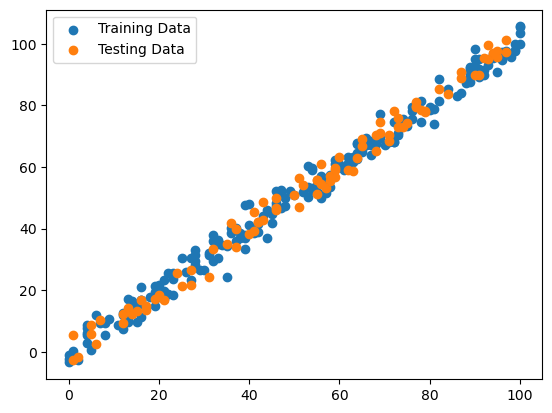

In [450]:
plt.scatter(x_train,y_train,label="Training Data")
plt.scatter(x_test,y_test,label="Testing Data")
plt.legend()
plt.show()

In [538]:
#Model Building

In [451]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,input_shape=(1,)),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
]) 

In [452]:
#Compile Model

In [453]:
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
             metrics=['mae'])

In [454]:
# Model train

In [455]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
7/7 [==============================] - 1s 3ms/step - loss: 40.5317 - mae: 40.5317
Epoch 2/20
7/7 [==============================] - 0s 2ms/step - loss: 15.2503 - mae: 15.2503
Epoch 3/20
7/7 [==============================] - 0s 3ms/step - loss: 4.0189 - mae: 4.0189
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 4.0083 - mae: 4.0083
Epoch 5/20
7/7 [==============================] - 0s 2ms/step - loss: 3.5669 - mae: 3.5669
Epoch 6/20
7/7 [==============================] - 0s 3ms/step - loss: 3.9279 - mae: 3.9279
Epoch 7/20
7/7 [==============================] - 0s 2ms/step - loss: 3.8269 - mae: 3.8269
Epoch 8/20
7/7 [==============================] - 0s 3ms/step - loss: 3.0122 - mae: 3.0122
Epoch 9/20
7/7 [==============================] - 0s 2ms/step - loss: 2.7277 - mae: 2.7277
Epoch 10/20
7/7 [==============================] - 0s 3ms/step - loss: 2.6527 - mae: 2.6527
Epoch 11/20
7/7 [==============================] - 0s 2ms/step - loss: 2.9414 - mae: 

In [456]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 50)                100       
                                                                 
 dense_51 (Dense)            (None, 20)                1020      
                                                                 
 dense_52 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1141 (4.46 KB)
Trainable params: 1141 (4.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [539]:
# Prediction

In [457]:
pred=model.predict(x_test)

3/3 [==============================] - 0s 2ms/step


In [458]:
pred[:10]

array([[ 57.134167],
       [ 60.420864],
       [ 17.693775],
       [ 79.045494],
       [104.243515],
       [ 54.94303 ],
       [ 80.14105 ],
       [ 29.745005],
       [ 47.274063],
       [ 13.31151 ]], dtype=float32)

In [459]:
y_test.head(10)

52     54.081706
216    51.107743
286    16.749239
273    77.996948
217    95.797473
67     50.963436
191    72.862825
23     21.713803
89     48.672526
218     9.241139
Name: y, dtype: float64

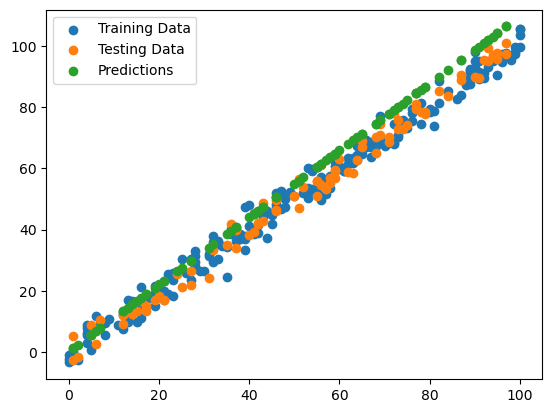

In [460]:
plt.scatter(x_train,y_train,label="Training Data")
plt.scatter(x_test,y_test,label="Testing Data")
plt.scatter(x_test,pred,label="Predictions")
plt.legend()
plt.show()

In [540]:
#Model Evaluation

In [461]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 5.0853 - mae: 5.0853


[5.085336685180664, 5.085336685180664]

In [462]:
# Using Mean Absolute Error

In [463]:
mae=tf.metrics.mean_absolute_error(y_test,tf.squeeze(pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=5.085337>

In [464]:
# Using Mean Squared Error

In [465]:
mse=tf.metrics.mean_squared_error(y_test,tf.squeeze(pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=33.51708>

# Classification with TensorFlow

In [466]:
data=pd.read_csv("dataset_classification.csv")

In [467]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [468]:
data.shape

(205, 3)

In [469]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  205 non-null    float64
 1   Weight  205 non-null    float64
 2   Sex     205 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.9+ KB


In [470]:
data.describe()

,Height,Weight
count,205.000000,205.000000
mean,160.874125,69.927028
std,15.171040,15.462396
min,123.007006,34.726666
25%,148.942667,58.583137
50%,161.749388,69.544469
75%,172.608090,77.964667
max,199.282251,129.410122


In [471]:
data.loc[data['Sex']=="Male",'Sex']=1
data.loc[data['Sex']=="Female",'Sex']=0

In [472]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [473]:
x=data.drop("Sex",axis=1)

In [474]:
y=data['Sex']

In [475]:
y=y.astype('int64')

In [484]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x,columns=['Height','Weight'])

In [485]:
x.head()

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


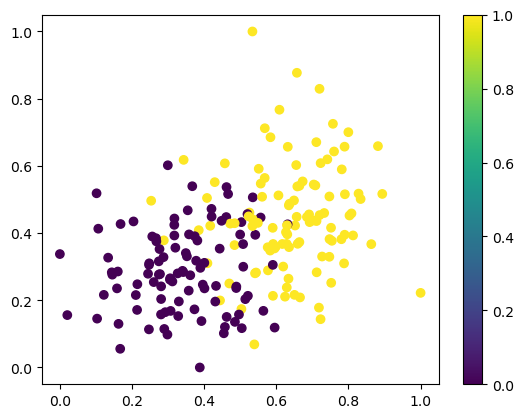

In [486]:
plt.scatter(x['Height'],x['Weight'],c=y)
plt.colorbar()
plt.show()

In [487]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [488]:
x_train.shape

(153, 2)

In [489]:
x_test.shape

(52, 2)

In [490]:
# Model Building

In [582]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation='relu',input_shape=(2,)),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(2,activation="softmax")
]) 

In [583]:
#Compile Model

In [584]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
             metrics=['accuracy'])

In [585]:
#Train Model

In [586]:
history=model.fit(x_train,y_train,epochs=20)

Epoch 1/20
5/5 [==============================] - 1s 2ms/step - loss: 0.6301 - accuracy: 0.6536
Epoch 2/20
5/5 [==============================] - 0s 3ms/step - loss: 0.4914 - accuracy: 0.7778
Epoch 3/20
5/5 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.8039
Epoch 4/20
5/5 [==============================] - 0s 3ms/step - loss: 0.3632 - accuracy: 0.8235
Epoch 5/20
5/5 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.8627
Epoch 6/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2970 - accuracy: 0.8627
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2925 - accuracy: 0.8824
Epoch 8/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2931 - accuracy: 0.8627
Epoch 9/20
5/5 [==============================] - 0s 4ms/step - loss: 0.2977 - accuracy: 0.8758
Epoch 10/20
5/5 [==============================] - 0s 4ms/step - loss: 0.2693 - accuracy: 0.8693
Epoch 11/20
5/5 [======================

In [587]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 50)                150       
                                                                 
 dense_63 (Dense)            (None, 20)                1020      
                                                                 
 dense_64 (Dense)            (None, 2)                 42        
                                                                 
Total params: 1212 (4.73 KB)
Trainable params: 1212 (4.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [588]:
#prediction

In [589]:
pred=model.predict(x_test)

2/2 [==============================] - 0s 3ms/step


In [590]:
pred[:8]

array([[0.95812505, 0.04187499],
       [0.58897376, 0.41102624],
       [0.41577154, 0.58422846],
       [0.43303677, 0.5669632 ],
       [0.9216966 , 0.07830342],
       [0.14042062, 0.85957944],
       [0.9316951 , 0.06830493],
       [0.86304533, 0.1369547 ]], dtype=float32)

In [591]:
import numpy as np
pred=np.argmax(pred,axis=1)
pred[:8]

array([0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [592]:
y_test.head(8)

59     0
108    0
14     0
157    0
20     0
37     1
150    0
98     0
Name: Sex, dtype: int64

In [593]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.2542 - accuracy: 0.8462


[0.25418007373809814, 0.8461538553237915]

In [594]:
precision=tf.keras.metrics.Precision()
precision.update_state(y_test,pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.86206895>

In [595]:
recall=tf.keras.metrics.Recall()
recall.update_state(y_test,pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.86206895>